#### Load libraries

In [1]:
from SALib.analyze import sobol ##sobol is a type of SA analysis implemented in SALib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Define Sobol Problem

In [2]:
'''
input = {'uptake_rate_cancer': 1.0, 'secretion_rate_cancer':1.0, 'speed_cancer': 1.0, 'transformation_rate_cancer': 3e-5, 'relative_maximum_adhesion_distance_cancer': 0, 'cell_adhesion_affinity_cancer': 1,
         'speed_monocytes': 1.0, 'transformation_rate_monocytes': 95e-6, 'phagocytosis_rate_monocytes':25e-2, 'speed_macrophages': 1.0, 'phagocytosis_rate_macrophages':92e-2, 
         'attack_rate_macrophages': 5e-2, 'relative_maximum_adhesion_distance_macrophages': 0, 'cell_adhesion_affinity_macrophages': 1, 'speed_NLCs': 1.0, 'phagocytosis_rate_NLCs':4e-2, 
         'secretion_rate_apoptotic': 1.0, 'speed_apoptotic': 1.0, 'transformation_rate_apoptotic': 5e-05, 'secretion_rate_dead': 1.0}
'''

input = {'secretion_rate_cancer':1.0, 'speed_cancer': 1.0, 'transformation_rate_cancer': 3e-5, 'speed_monocytes': 1.0, 'transformation_rate_monocytes': 95e-6, 
                      'relative_maximum_adhesion_distance_macrophages': 0, 'speed_NLCs': 1.0, 'speed_apoptotic': 1.0}

default_values = list(input.values())

#Define the problem for SALib
problem = {
    'num_vars': len(default_values),
    'names': list(input.keys()),
    'bounds': np.array([[0, 0, 3e-7, 0, 95e-7, 0, 0, 0],
                        [3, 3, 3e-3, 3, 95e-3, 3, 3, 3]]).T # 100% percent of variation from default values 
}

#Number of samples N(2D+2) where N:nsamples and D:ninputs. For sobol analysis N needs to be a power of 2, if not it will give error

experimental = np.loadtxt('../../Netlogo_NLCs-CLL/filtered_fused_9patients.csv', delimiter=",", skiprows=1)
time_points = experimental[:,0]

In [115]:
samples0 = pd.read_csv('../data_output/Sensitivity_analysis/samples/samples_test1/Samples_0.csv', delimiter=",")
samples1 = pd.read_csv('../data_output/Sensitivity_analysis/samples/samples_test1/Samples_1.csv', delimiter=",")
samples_data = pd.concat([samples0, samples1], axis = 0) 
samples_data.iloc[:,1]

0       1.942960
1       1.942960
2       2.827645
3       1.942960
4       1.942960
          ...   
4603    2.272263
4604    2.272263
4605    2.272263
4606    2.272263
4607    2.272263
Name: speed_cancer, Length: 9216, dtype: float64

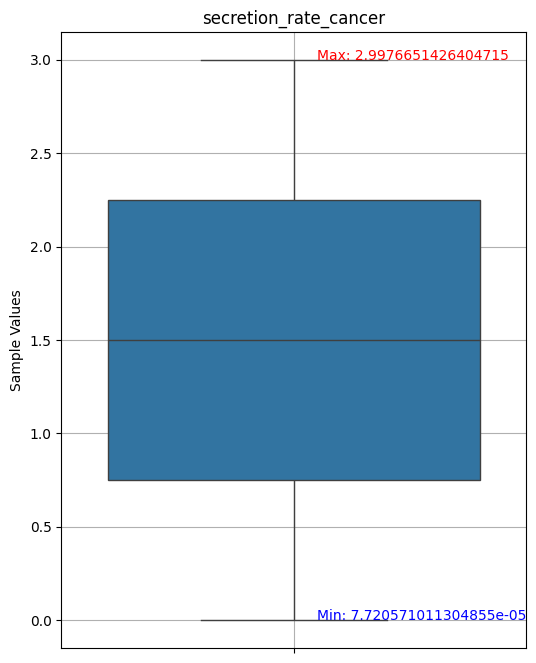

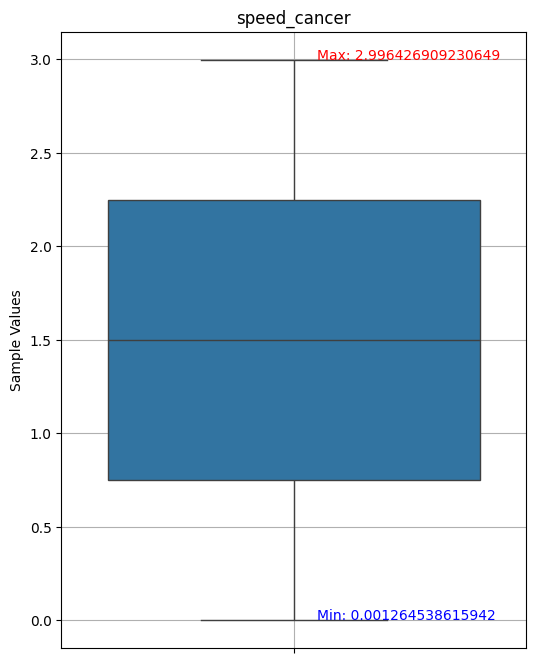

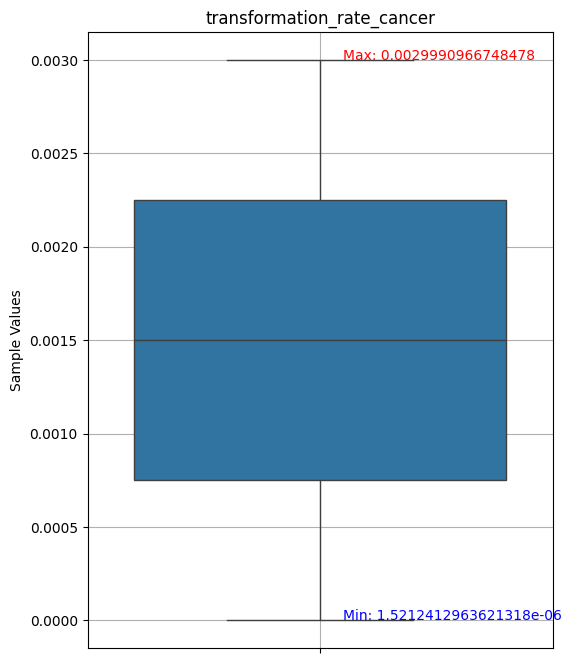

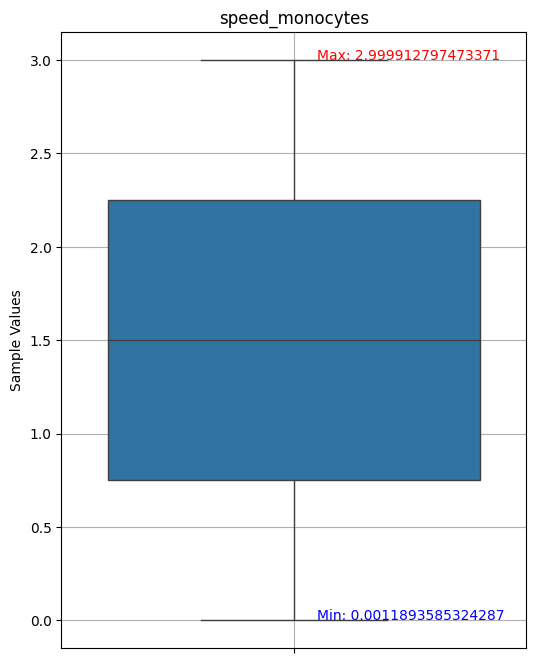

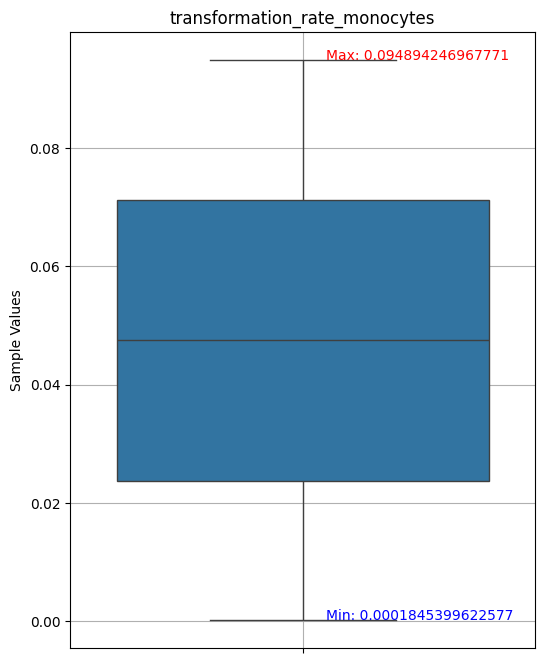

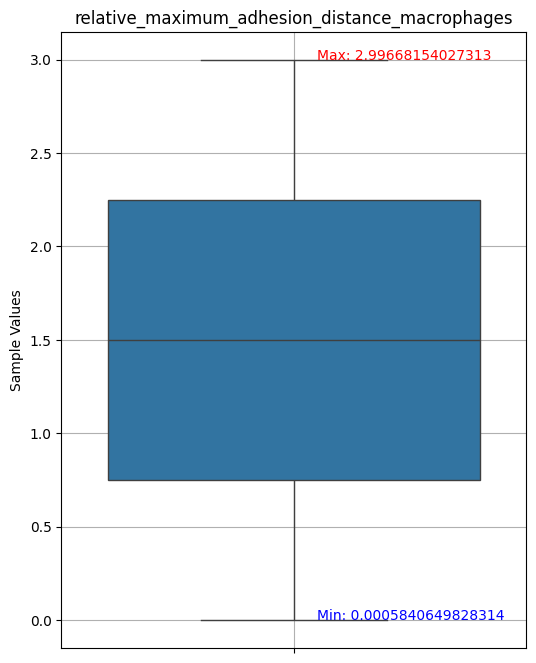

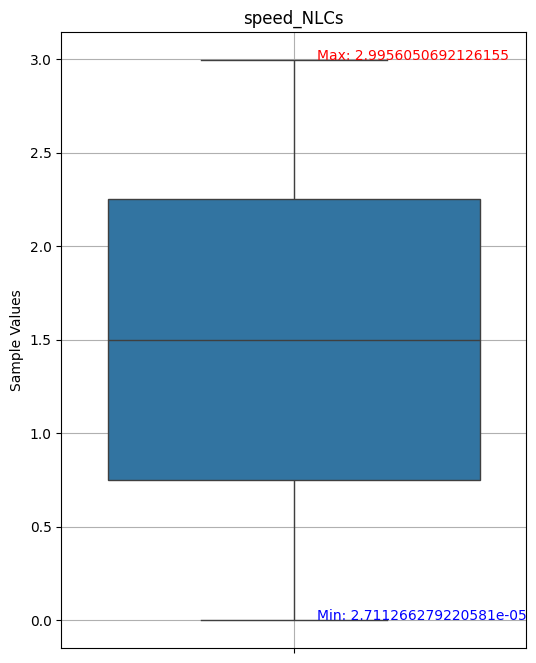

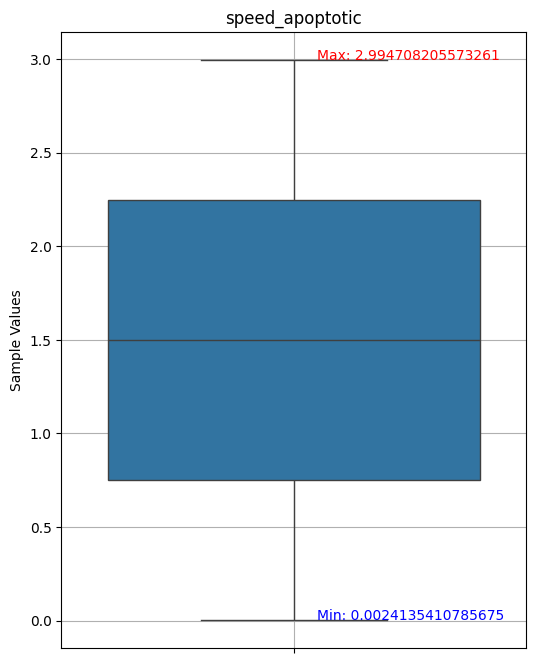

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming samples_data is a DataFrame where each column represents a parameter with sample values
for i in range(0, samples_data.shape[1]):
    # Extract the parameter column
    samples = samples_data.iloc[:, i]
    parameter_name = samples_data.columns[i]  # Get the name of the parameter

    # Create a vertical box plot
    plt.figure(figsize=(6, 8))
    sns.boxplot(y=samples)  # Vertical orientation

    # Add min and max values to the plot
    min_value = samples.min()
    max_value = samples.max()
    plt.text(0.05, min_value, f'Min: {min_value}', horizontalalignment='left', color='blue')
    plt.text(0.05, max_value, f'Max: {max_value}', horizontalalignment='left', color='red')

    # Plot settings
    plt.title(f'{parameter_name}')
    plt.ylabel('Sample Values')
    plt.grid(True)
    plt.show()


In [122]:
print(min_value)
print(max_value)

1.5212412963621318e-06
0.0029990966748478


#### Load output from simulations (viability and concentration)

In [3]:
#Read output of simulation
viability_data_node1 = pd.read_csv('../data_output/Sensitivity_analysis/results/viability_1.csv', delimiter=",")
viability_data_node2 = pd.read_csv('../data_output/Sensitivity_analysis/results/viability_2.csv', delimiter=",")

concentration_data_node1 = pd.read_csv('../data_output/Sensitivity_analysis/results/concentration_1.csv', delimiter=",")
concentration_data_node2 = pd.read_csv('../data_output/Sensitivity_analysis/results/concentration_2.csv', delimiter=",")

viability_data = pd.concat([viability_data_node1, viability_data_node2], axis = 1) 
concentration_data = pd.concat([concentration_data_node1, concentration_data_node2], axis=1)


In [87]:
viability_data.shape[0]

10

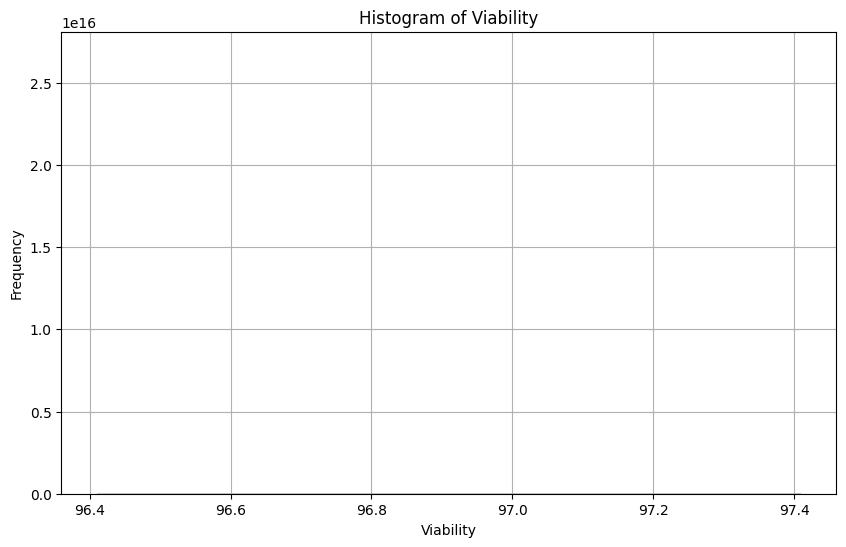

Skewness of viability: 0.0


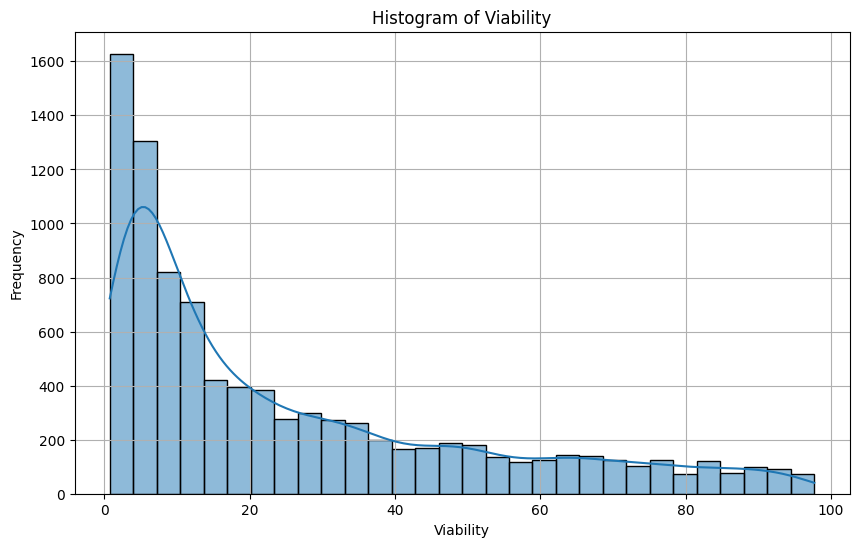

Skewness of viability: 1.1546713968488564


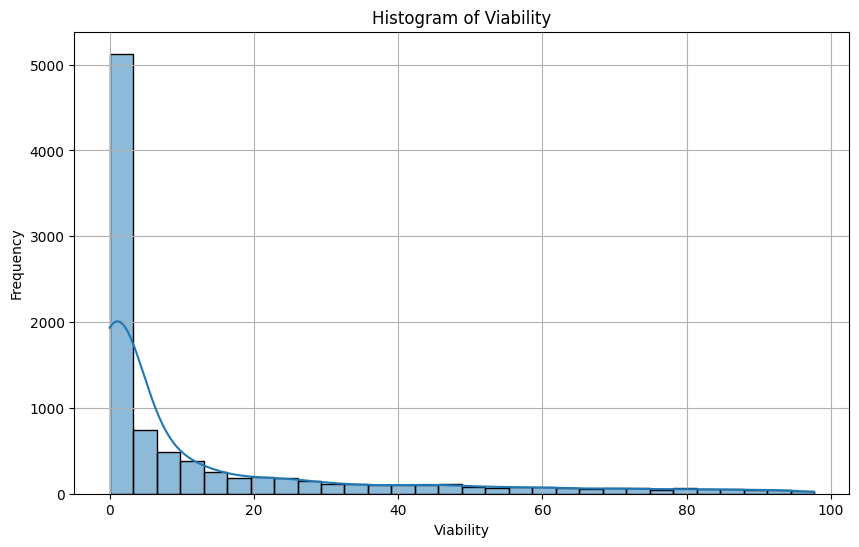

Skewness of viability: 2.0209192327181444


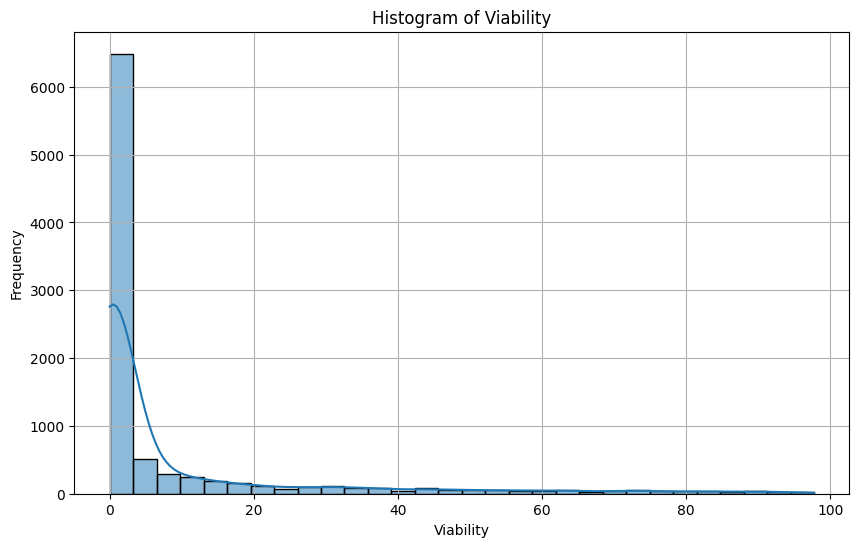

Skewness of viability: 2.6880835528924276


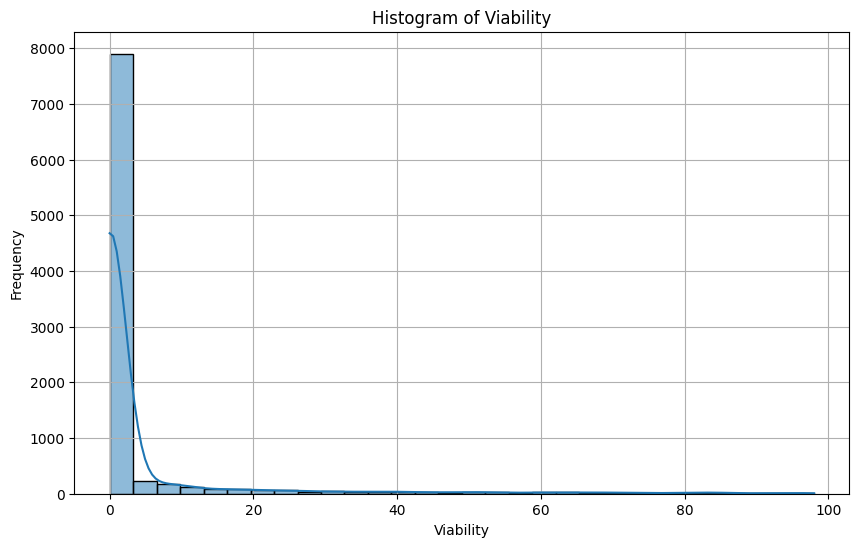

Skewness of viability: 4.296306668096269


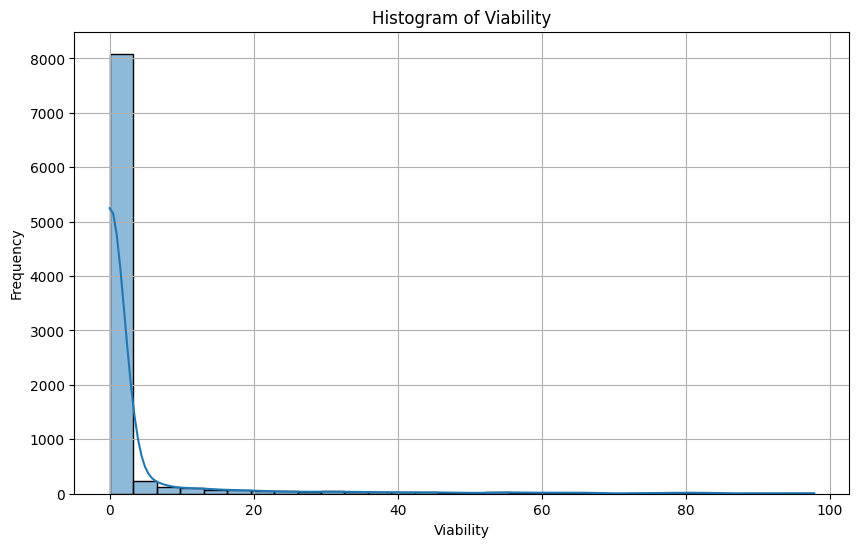

Skewness of viability: 4.795387035337229


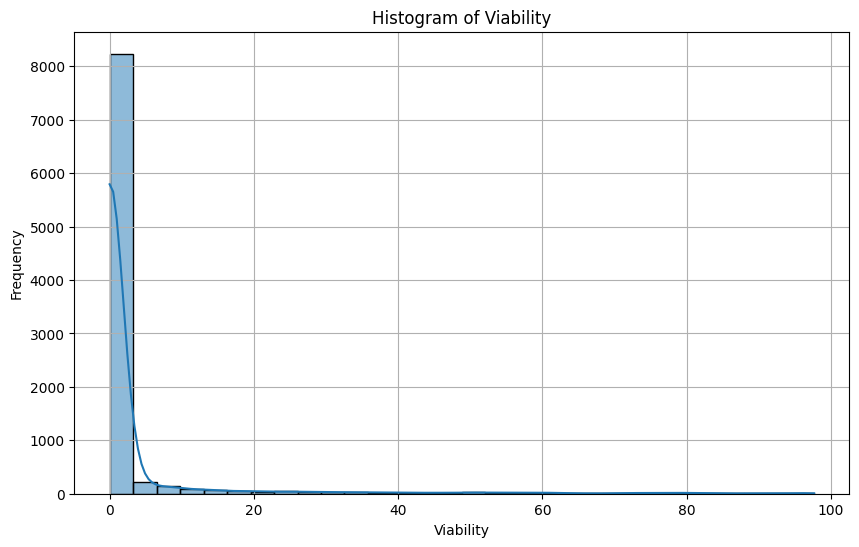

Skewness of viability: 5.277392222065836


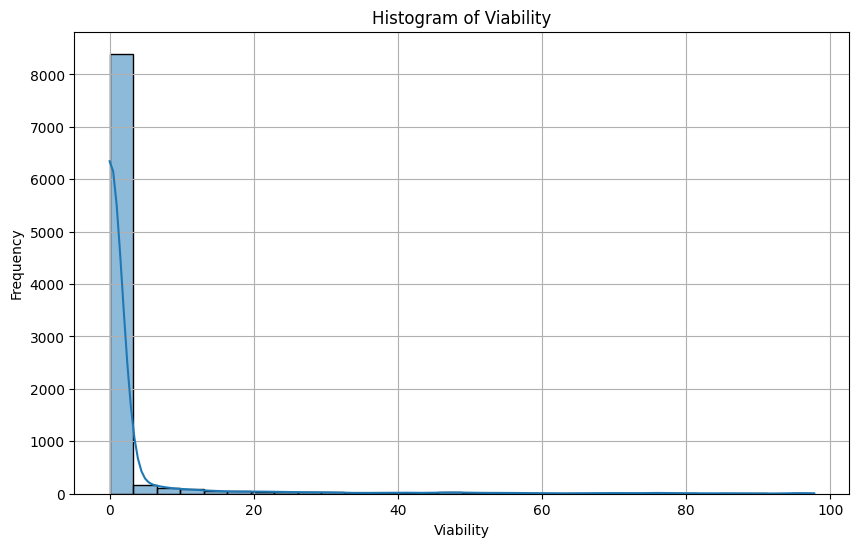

Skewness of viability: 5.754427193570734


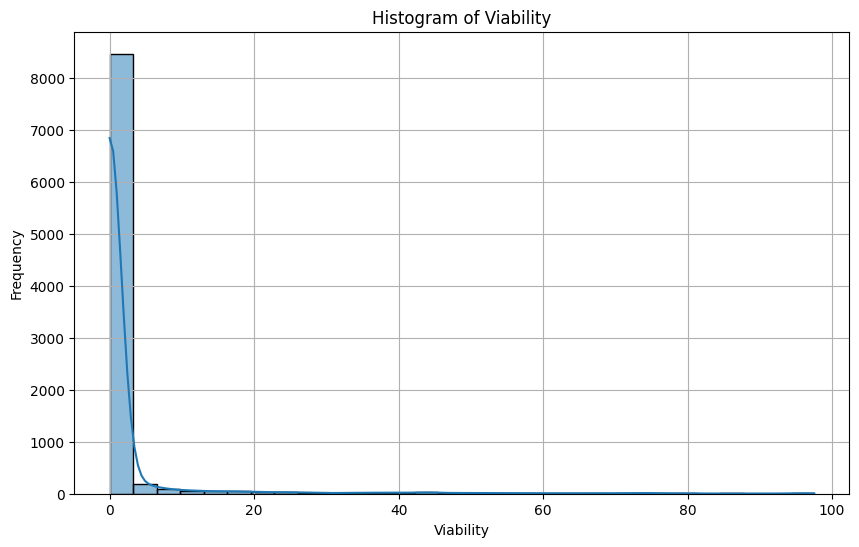

Skewness of viability: 6.205311897252241


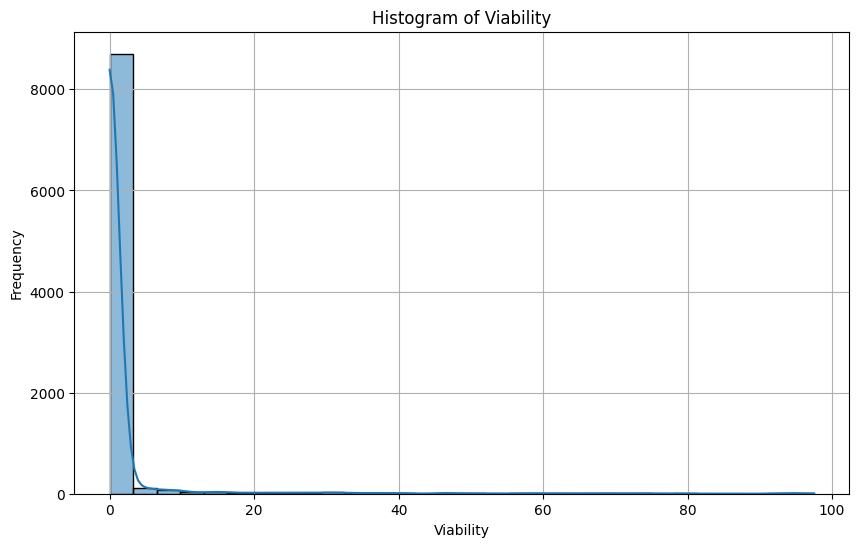

Skewness of viability: 7.607419632428086


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(0, viability_data.shape[0]):
    # Assuming the viability data is in a column named 'viability'
    viability = viability_data.iloc[i]  # Replace with the actual column name if different

    # Create a histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(viability, bins=30, kde=True)  # kde=True adds a kernel density estimate
    plt.title('Histogram of Viability')
    plt.xlabel('Viability')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Calculate skewness
    skewness = viability.skew()
    print(f'Skewness of viability: {skewness}')     

In [92]:
zero_indices = viability_data.iloc[2][viability_data.iloc[2] == 0].index.tolist()
print(zero_indices)


['1', '3', '6', '9', '12', '17', '90', '91', '92', '94', '95', '96', '98', '101', '111', '117', '118', '121', '122', '125', '171', '172', '174', '175', '176', '177', '178', '179', '193', '199', '200', '202', '204', '206', '324', '328', '329', '330', '331', '332', '335', '399', '405', '406', '408', '409', '410', '411', '412', '414', '453', '454', '460', '461', '463', '464', '504', '505', '506', '508', '509', '510', '511', '512', '568', '596', '598', '601', '602', '633', '639', '640', '643', '644', '645', '646', '647', '652', '653', '656', '669', '676', '683', '756', '757', '762', '765', '767', '795', '801', '802', '804', '805', '806', '807', '808', '809', '846', '847', '848', '850', '851', '853', '854', '857', '920', '921', '925', '927', '928', '930', '931', '932', '933', '934', '964', '972', '973', '974', '976', '977', '978', '979', '980', '1008', '1009', '1010', '1012', '1013', '1015', '1016', '1060', '1089', '1092', '1093', '1095', '1103', '1191', '1197', '1200', '1201', '1202', '120

In [81]:
viability_data.iloc[1]

0        5.150215
1        4.862024
2        5.278592
3        4.461942
4        4.970760
          ...    
4603    11.505922
4604     8.402822
4605    12.477558
4606    12.405303
4607    11.149826
Name: 1, Length: 9216, dtype: float64

In [59]:
viability_data.shape[0]

10

In [71]:
additional_columns = 18432
viability_data_expanded = np.random.uniform(0, 100, size=(viability_data.shape[0], additional_columns))

# Create a DataFrame for the new data
#new_df = pd.DataFrame(new_data)

# Concatenate the new DataFrame to the existing one
#viability_data_expanded = pd.concat([viability_data, new_df], axis=1)

# Check the new shape and first few rows
viability_data_expanded = pd.DataFrame(viability_data_expanded)
print(viability_data_expanded.shape)

(10, 18432)


#### Run sobol analysis

#### Cell viability

In [72]:
#Sobol analysis is run by each time point and results are gathered in a matrix 
Si_S1 = []
Si_S1conf = []
Si_ST = []
Si_STconf = []
for i in range(0, viability_data_expanded.shape[0]):
    Si = sobol.analyze(problem, viability_data_expanded.iloc[i].values, print_to_console=False, calc_second_order=True)
    Si_S1.append(Si['S1'])
    Si_S1conf.append(Si['S1_conf'])
    Si_ST.append(Si['ST'])
    Si_STconf.append(Si['ST_conf']) 

/home/marcelo.hurtado/anaconda3/envs/python3.10/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


In [43]:
from SALib.sample.morris import sample
from SALib.analyze.morris import analyze
import matplotlib.pyplot as plt
import numpy as np

num_trajectories = 1024  # Adjust for your computational resources
X = sample(problem, N=num_trajectories, num_levels=4)
print(X.shape)
print(viability_data.shape)

(9216, 8)
(10, 9216)


/home/marcelo.hurtado/anaconda3/envs/python3.10/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


/home/marcelo.hurtado/anaconda3/envs/python3.10/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


                                                      mu    mu_star  \
secretion_rate_cancer                           1.183709  12.113409   
speed_cancer                                   -0.522407  12.298969   
transformation_rate_cancer                     -0.164372  11.043185   
speed_monocytes                                 0.307905  11.829628   
transformation_rate_monocytes                   0.529819  12.759715   
relative_maximum_adhesion_distance_macrophages -0.789389  13.601642   
speed_NLCs                                     -0.316897  11.084143   
speed_apoptotic                                 0.403020  11.507564   

                                                    sigma  mu_star_conf  
secretion_rate_cancer                           27.064221      1.446628  
speed_cancer                                    27.996671      1.598091  
transformation_rate_cancer                      25.556931      1.306802  
speed_monocytes                                 26.273197      1

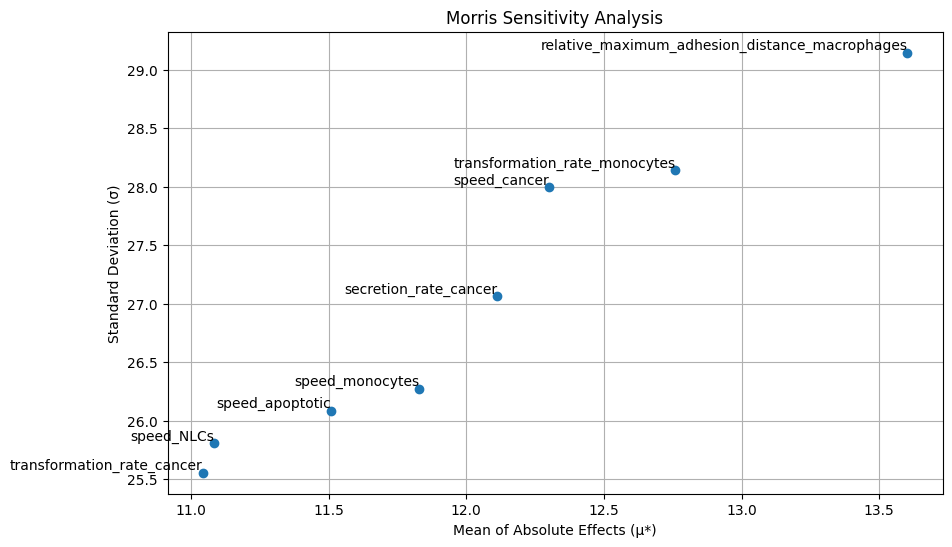

In [51]:
from SALib.sample.morris import sample
from SALib.analyze.morris import analyze
import matplotlib.pyplot as plt
import numpy as np

num_trajectories = 1024  # Adjust for your computational resources
X = sample(problem, N=num_trajectories, num_levels=4)


# Perform Morris analysis
Si = analyze(problem, X, viability_data.iloc[1].values, print_to_console=True, num_levels=4)

# Plotting the Morris indices (mean absolute effect μ* and standard deviation σ)
plt.figure(figsize=(10, 6))
plt.errorbar(Si['mu_star'], Si['sigma'], fmt='o')

# Label each point with the parameter name
for i, param_name in enumerate(problem['names']):
    plt.text(Si['mu_star'][i], Si['sigma'][i], param_name, ha='right', va='bottom')

plt.xlabel("Mean of Absolute Effects (μ*)")
plt.ylabel("Standard Deviation (σ)")
plt.title("Morris Sensitivity Analysis")
plt.grid(True)
plt.show()


                                                      S1        ST   S1_conf  \
secretion_rate_cancer                           0.000477  0.342938  0.013319   
speed_cancer                                    0.000481  0.374672  0.016204   
transformation_rate_cancer                      0.000217  0.342801  0.013684   
speed_monocytes                                 0.000118  0.330620  0.013522   
transformation_rate_monocytes                   0.000443  0.330253  0.013779   
relative_maximum_adhesion_distance_macrophages  0.000312  0.356124  0.014087   
speed_NLCs                                      0.000213  0.330808  0.013269   
speed_apoptotic                                 0.000311  0.312654  0.013459   

                                                 ST_conf  
secretion_rate_cancer                           0.041385  
speed_cancer                                    0.038666  
transformation_rate_cancer                      0.035782  
speed_monocytes                            

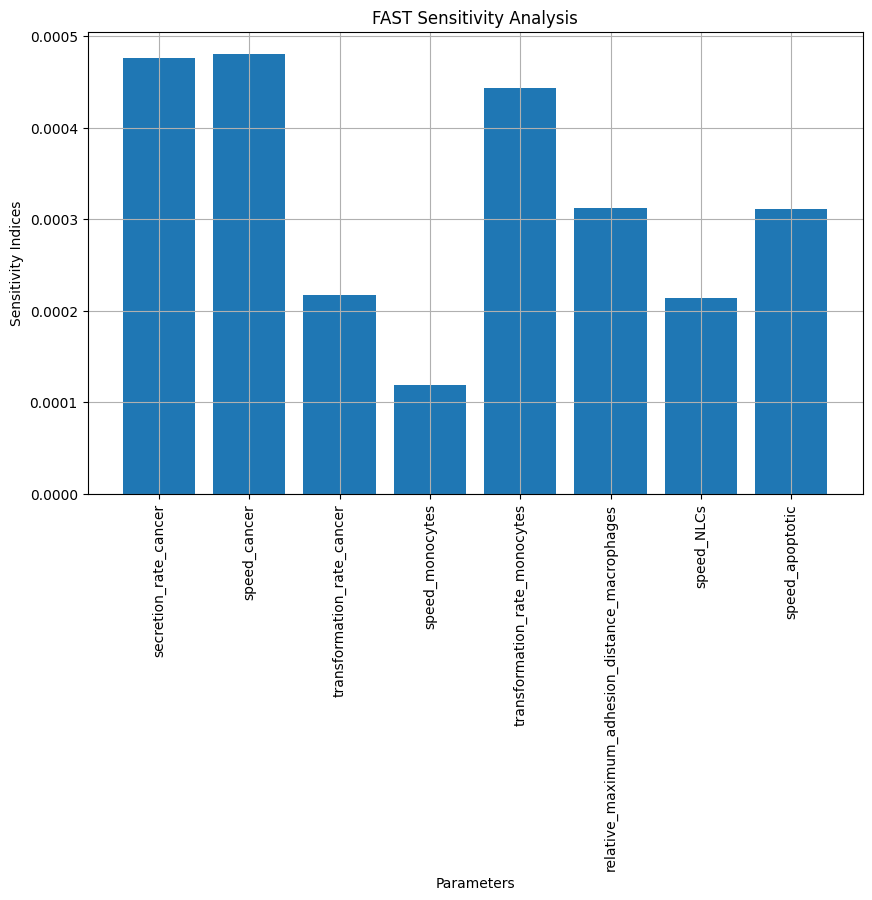

In [58]:
from SALib.analyze import fast
Si = fast.analyze(problem, viability_data.iloc[1].values, print_to_console=True)

import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(problem['names'], Si['S1'], capsize=5)
plt.xlabel('Parameters')
plt.ylabel('Sensitivity Indices')
plt.title('FAST Sensitivity Analysis')
plt.grid(True)

plt.xticks(rotation=90)  # Rotate labels by 90 degrees for vertical alignment

plt.show()

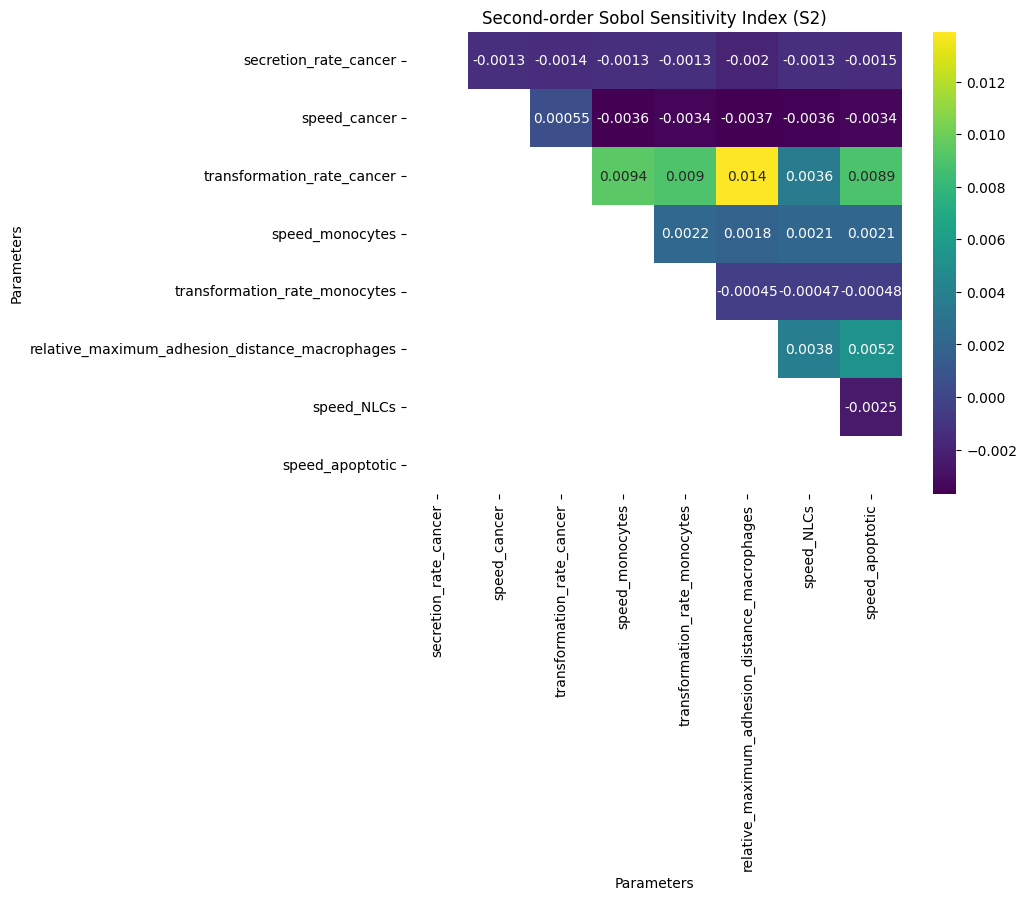

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the S2 matrix from the Sobol analysis output
S2_matrix = Si['S2']

# Create a heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(S2_matrix, annot=True, cmap="viridis", xticklabels=problem['names'], yticklabels=problem['names'])

plt.xlabel("Parameters")
plt.ylabel("Parameters")
plt.title("Second-order Sobol Sensitivity Index (S2)")
plt.show()


In [73]:
Si_S1 = pd.DataFrame(Si_S1, columns=input.keys())
Si_S1conf = pd.DataFrame(Si_S1conf, columns=input.keys())
Si_ST = pd.DataFrame(Si_ST, columns=input.keys())
Si_STconf = pd.DataFrame(Si_STconf, columns=input.keys())

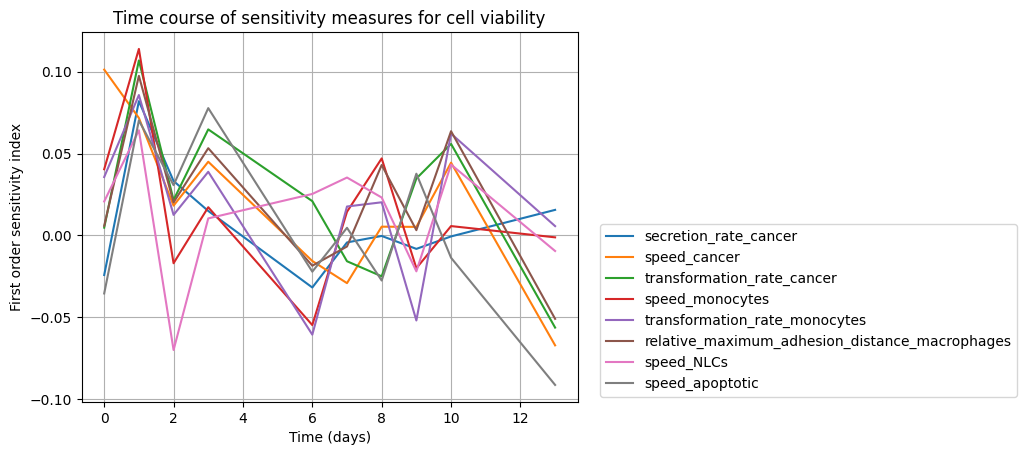

In [76]:
#### Sensitivity index First order
for param_index in range(Si_S1.shape[1]):
    plt.plot(time_points, Si_S1.iloc[:, param_index], label=Si_S1.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('First order sensitivity index')
plt.title('Time course of sensitivity measures for cell viability')
plt.legend(loc='upper right', bbox_to_anchor=(1.9, 0.5))

#plt.ylim(0, 1)  # Set y-axis limits
plt.grid(True)
plt.show()


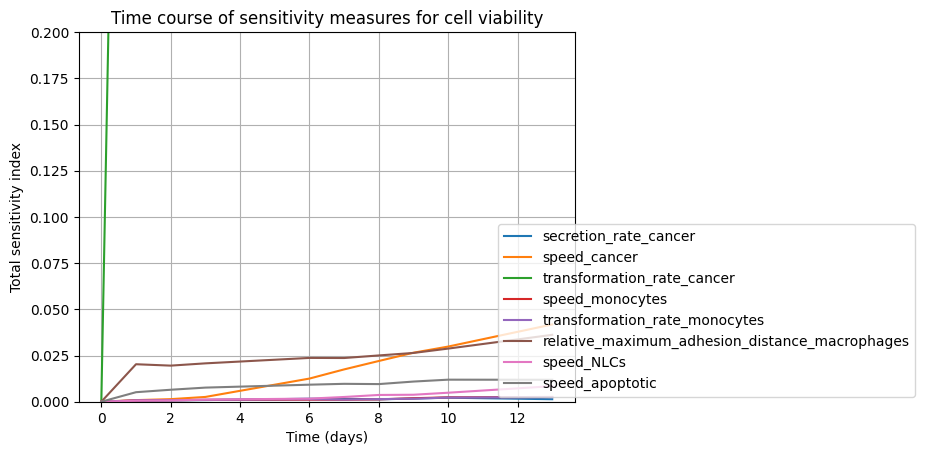

In [9]:
#### Sensitivity index Total
for param_index in range(Si_ST.shape[1]):
    plt.plot(time_points, Si_ST.iloc[:, param_index], label=Si_ST.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('Total sensitivity index')
plt.title('Time course of sensitivity measures for cell viability')
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.5))

plt.ylim(0, 0.2)  # Set y-axis limits
plt.grid(True)
plt.show()

#### Cell concentration

In [8]:
#Sobol analysis is run by each time point and results are gathered in a matrix 
Si_S1 = []
Si_S1conf = []
Si_ST = []
Si_STconf = []
for i in range(0, concentration_data.shape[0]):
    Si = sobol.analyze(problem, concentration_data.iloc[i].values, print_to_console=False, calc_second_order=True)
    Si_S1.append(Si['S1'])
    Si_S1conf.append(Si['S1_conf'])
    Si_ST.append(Si['ST'])
    Si_STconf.append(Si['ST_conf']) 

/home/marcelo.hurtado/anaconda3/envs/python3.10/lib/python3.10/site-packages/SALib/analyze/sobol.py:141: RuntimeWarning: invalid value encountered in divide
  Y = (Y - Y.mean()) / Y.std()


In [9]:
Si_S1 = pd.DataFrame(Si_S1, columns=input.keys())
Si_S1conf = pd.DataFrame(Si_S1conf, columns=input.keys())
Si_ST = pd.DataFrame(Si_ST, columns=input.keys())
Si_STconf = pd.DataFrame(Si_STconf, columns=input.keys())

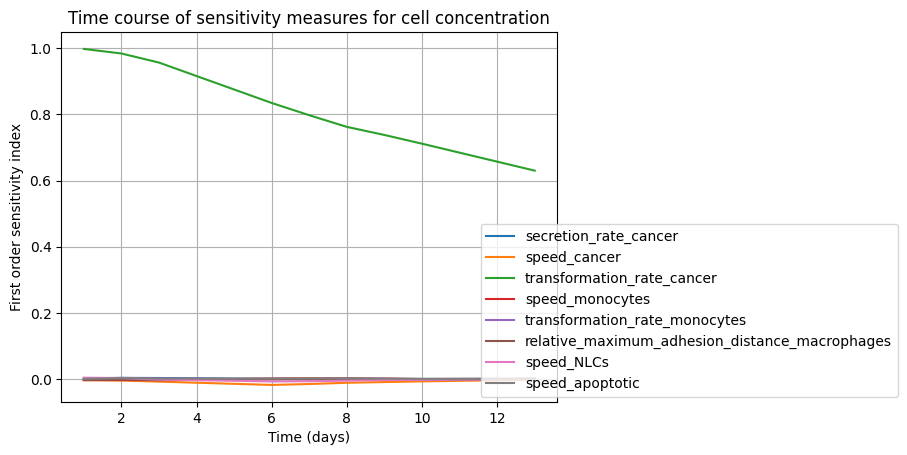

In [10]:
#### Sensitivity index First order
for param_index in range(Si_S1.shape[1]):
    plt.plot(time_points, Si_S1.iloc[:, param_index], label=Si_S1.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('First order sensitivity index')
plt.title('Time course of sensitivity measures for cell concentration')
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.5))

plt.grid(True)
plt.show()

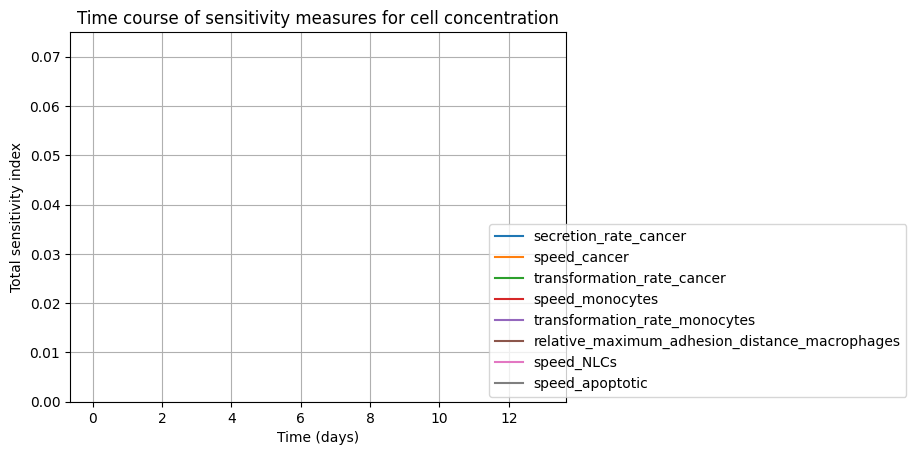

In [118]:
#### Sensitivity index Total
for param_index in range(Si_ST.shape[1]):
    plt.plot(time_points, Si_ST.iloc[:, param_index], label=Si_ST.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('Total sensitivity index')
plt.title('Time course of sensitivity measures for cell concentration')
plt.ylim(0, 0.075)

plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.5))

plt.grid(True)
plt.show()